In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/Projects/ML_Lab/data/raw/train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [15]:
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 231 entries, Id to SaleCondition_Partial
dtypes: bool(193), float64(3), int64(35)
memory usage: 708.7 KB


Id                         0
MSSubClass                 0
LotFrontage              259
LotArea                    0
OverallQual                0
                        ... 
SaleCondition_AdjLand      0
SaleCondition_Alloca       0
SaleCondition_Family       0
SaleCondition_Normal       0
SaleCondition_Partial      0
Length: 231, dtype: int64

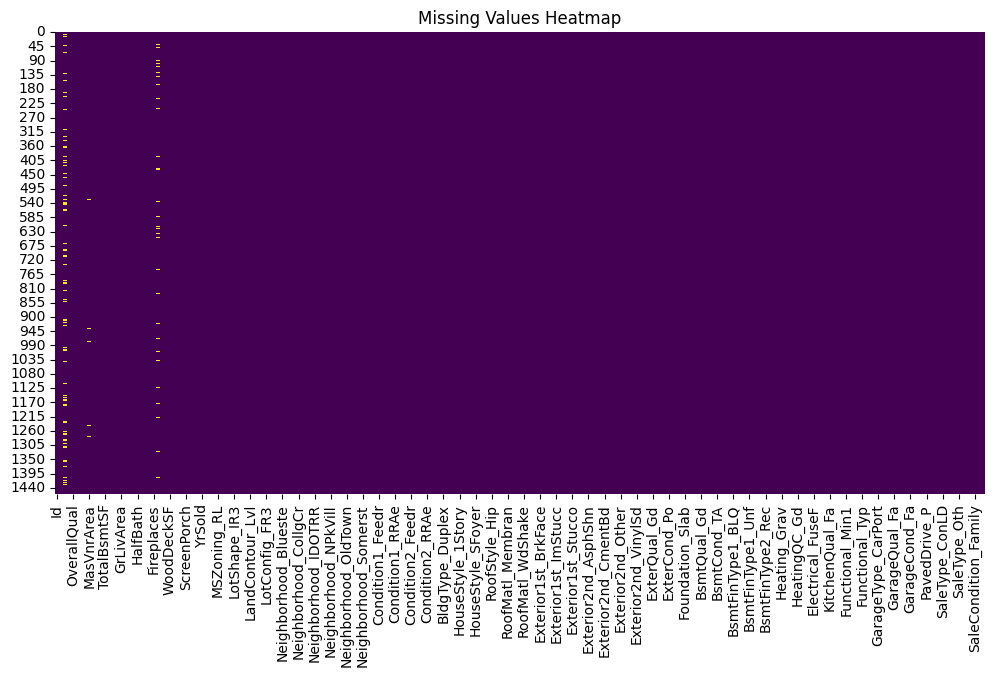

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
missing_percent = df.isnull().mean()
to_drop = missing_percent[missing_percent > 0.3].index
df.drop(columns=to_drop, inplace=True)

In [13]:
num_cols = df.select_dtypes(include=['float64, int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Fill numerical missing values
for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)
# Fill categorical missing values
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


C:\Users\asutr\AppData\Local\Temp\ipykernel_12580\711961747.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [14]:
df = pd.get_dummies(df, drop_first=True)

In [17]:
df.to_csv('D:/Projects/ML_Lab/data/processed/train_cleaned.csv', index=False)

### Cleaning the House Prices Dataset

- Visualized missing values
- Dropped columns with >30% missing data
- Filled remaining values
- Encoded categorical variables using one-hot encoding
- Saved the cleaned data to processed folder